In [5]:
!pip install wordcloud

# Table of contents

<ul>
<li><a href="#Clean">Clean & Split the text</a></li>
<li><a href="#Count"> Count the words inthe text</a></li>
<li><a href="#wc">Create the wordcloud</a></li>
</ul>

### Import Libraries

In [6]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

### Import CSV file

In [7]:
text=pd.read_csv("articles_small.csv")
stopwords=set(STOPWORDS)
text

,2020-09-19 17:52:00,"mpartselona: o kouman ipe ston pouts na psaksi nea omada epimelia: kostas avgoustakis dimosievsi: 19 sep. 2020 17:52 o proponitis tis mpartselona, ronalnt kouman, ferete na ipe ston riki pouts na anazitisi ton epomeno stathmo tis karieras tou, efoson den briskete sta plana tou gia ti nea sezon. sta plana tou ronalnt kouman gia ti nea sezon den briskete o riki pouts. o proponitis tis mpartselona, opos anaferi to katalaniko radiofono rac1, ipe ston 21hrono meso na psaksi gia tin nea tou omada. advertising simfona me to ispaniko mme, o kouman den pistike me osa ide apo ton pouts stin proetimasia ton katalanon, eno parallila theori oti den iparhi horos gi' avton sti mesea grammi tis omadas tou, efoson eki briskonte idi i nte giongk ke pianits. o pouts, o opios proerhete apo ta fitoria tis mpartselona, ehi agonisti se 15 pehnidia me tin andriki omada ton katalanon, eno o kike setien ton hrisimopiise 11 fores stin persini sezon tis la liga. to simboleo tou me tous mplaougkrana ligi to 2023. diabaste akoma: mpartselona: i 16 akarpes epafes gia na klisi ton laoutaro martines mpartselona: o kouman theli ton ntest"
0,2020-09-19 17:54:00,astamatito gelio apo kimeno tou sb nation gia ...
1,2020-10-13 09:18:00,silber: mponous 1.000 dolaria ke mazemena repo...
2,2020-09-19 21:07:00,me othisi apo ton gkornton heigouornt i seltik...
3,2020-09-19 21:19:00,olimpiakos: halara sto parke meta apo tin epis...
4,2020-09-19 21:30:00,se estiatorio ton borion proastion giannis ke ...
5,2020-08-17 15:44:00,"""o artour trakare ipo tin epiria alkool"" epime..."
6,2020-08-29 11:02:00,gioubentous: eklise to deal me tin roma gia ti...
7,2020-09-02 09:20:00,mpartselona: gioubentous ke pari stin koursa g...
8,2020-08-27 19:29:00,gioubentous: to minima tou ronalnto gia tin ka...


<a id='Clean'></a>
## Clean & Split the text

In [8]:
# Drop Raws to make the text more clear
text = text.iloc[0:0]
text

,2020-09-19 17:52:00,"mpartselona: o kouman ipe ston pouts na psaksi nea omada epimelia: kostas avgoustakis dimosievsi: 19 sep. 2020 17:52 o proponitis tis mpartselona, ronalnt kouman, ferete na ipe ston riki pouts na anazitisi ton epomeno stathmo tis karieras tou, efoson den briskete sta plana tou gia ti nea sezon. sta plana tou ronalnt kouman gia ti nea sezon den briskete o riki pouts. o proponitis tis mpartselona, opos anaferi to katalaniko radiofono rac1, ipe ston 21hrono meso na psaksi gia tin nea tou omada. advertising simfona me to ispaniko mme, o kouman den pistike me osa ide apo ton pouts stin proetimasia ton katalanon, eno parallila theori oti den iparhi horos gi' avton sti mesea grammi tis omadas tou, efoson eki briskonte idi i nte giongk ke pianits. o pouts, o opios proerhete apo ta fitoria tis mpartselona, ehi agonisti se 15 pehnidia me tin andriki omada ton katalanon, eno o kike setien ton hrisimopiise 11 fores stin persini sezon tis la liga. to simboleo tou me tous mplaougkrana ligi to 2023. diabaste akoma: mpartselona: i 16 akarpes epafes gia na klisi ton laoutaro martines mpartselona: o kouman theli ton ntest"


In [9]:
# Define text 
text='mpartselona o kouman ipe ston pouts na psaksi nea omada epimelia: kostas avgoustakis dimosievsi 19 sep. 2020 17:52 o proponitis tis mpartselona, ronalnt kouman, ferete na ipe ston riki pouts na anazitisi ton epomeno stathmo tis karieras tou, efoson den briskete sta plana tou gia ti nea sezon. sta plana tou ronalnt kouman gia ti nea sezon den briskete o riki pouts. o proponitis tis mpartselona, opos anaferi to katalaniko radiofono rac1, ipe ston 21hrono meso na psaksi gia tin nea tou omada. advertising simfona me to ispaniko mme, o kouman den pistike me osa ide apo ton pouts stin proetimasia ton katalanon, eno parallila theori oti den iparhi horos gi avton sti mesea grammi tis omadas tou, efoson eki briskonte idi i nte giongk ke pianits. o pouts, o opios proerhete apo ta fitoria tis mpartselona, ehi agonisti se 15 pehnidia me tin andriki omada ton katalanon, eno o kike setien ton hrisimopiise 11 fores stin persini sezon tis la liga. to simboleo tou me tous mplaougkrana ligi to 2023. diabaste akoma: mpartselona: i 16 akarpes epafes gia na klisi ton laoutaro martines mpartselona: o kouman theli ton ntest'


In [14]:
# Clean punctuantion  
for char in '-.,\n':
  text = text.replace(char,'')
text=text.lower() 
print(text)

mpartselona o kouman ipe ston pouts na psaksi nea omada epimelia: kostas avgoustakis dimosievsi 19 sep 2020 17:52 o proponitis tis mpartselona ronalnt kouman ferete na ipe ston riki pouts na anazitisi ton epomeno stathmo tis karieras tou efoson den briskete sta plana tou gia ti nea sezon sta plana tou ronalnt kouman gia ti nea sezon den briskete o riki pouts o proponitis tis mpartselona opos anaferi to katalaniko radiofono rac1 ipe ston 21hrono meso na psaksi gia tin nea tou omada advertising simfona me to ispaniko mme o kouman den pistike me osa ide apo ton pouts stin proetimasia ton katalanon eno parallila theori oti den iparhi horos gi avton sti mesea grammi tis omadas tou efoson eki briskonte idi i nte giongk ke pianits o pouts o opios proerhete apo ta fitoria tis mpartselona ehi agonisti se 15 pehnidia me tin andriki omada ton katalanon eno o kike setien ton hrisimopiise 11 fores stin persini sezon tis la liga to simboleo tou me tous mplaougkrana ligi to 2023 diabaste akoma: mpart

In [16]:
#Transform all words in lowercase
text=text.lower()

In [18]:
# Create word list 
word_list=text.split()
print (word_list)

['mpartselona', 'o', 'kouman', 'ipe', 'ston', 'pouts', 'na', 'psaksi', 'nea', 'omada', 'epimelia:', 'kostas', 'avgoustakis', 'dimosievsi', '19', 'sep', '2020', '17:52', 'o', 'proponitis', 'tis', 'mpartselona', 'ronalnt', 'kouman', 'ferete', 'na', 'ipe', 'ston', 'riki', 'pouts', 'na', 'anazitisi', 'ton', 'epomeno', 'stathmo', 'tis', 'karieras', 'tou', 'efoson', 'den', 'briskete', 'sta', 'plana', 'tou', 'gia', 'ti', 'nea', 'sezon', 'sta', 'plana', 'tou', 'ronalnt', 'kouman', 'gia', 'ti', 'nea', 'sezon', 'den', 'briskete', 'o', 'riki', 'pouts', 'o', 'proponitis', 'tis', 'mpartselona', 'opos', 'anaferi', 'to', 'katalaniko', 'radiofono', 'rac1', 'ipe', 'ston', '21hrono', 'meso', 'na', 'psaksi', 'gia', 'tin', 'nea', 'tou', 'omada', 'advertising', 'simfona', 'me', 'to', 'ispaniko', 'mme', 'o', 'kouman', 'den', 'pistike', 'me', 'osa', 'ide', 'apo', 'ton', 'pouts', 'stin', 'proetimasia', 'ton', 'katalanon', 'eno', 'parallila', 'theori', 'oti', 'den', 'iparhi', 'horos', 'gi', 'avton', 'sti', 'me

### Add stop words in order to avoid unuseful word to be appeard in our wordcloud.

In [19]:
 import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
StopWords = ['ti','tis','na','den','tou','eno','apo','gia','tin','ton','ston','sta','na','ipe', 'ipe ston', 'ta']
stopwords.extend(StopWords)

<a id='Count'></a>
##  Count the words in the text

### Use Dictinary 
###### I used dictionary method in order to having more optimize results.

In [26]:
#Initialize dictinary
d={}
#Count the number each word come up in the text
for word in word_list:
    d[word]=d.get(word,0)+1

In [27]:
#Dictinary
d

{'mpartselona': 4,
 'o': 9,
 'kouman': 5,
 'ipe': 3,
 'ston': 3,
 'pouts': 5,
 'na': 5,
 'psaksi': 2,
 'nea': 4,
 'omada': 3,
 'epimelia:': 1,
 'kostas': 1,
 'avgoustakis': 1,
 'dimosievsi': 1,
 '19': 1,
 'sep': 1,
 '2020': 1,
 '17:52': 1,
 'proponitis': 2,
 'tis': 6,
 'ronalnt': 2,
 'ferete': 1,
 'riki': 2,
 'anazitisi': 1,
 'ton': 7,
 'epomeno': 1,
 'stathmo': 1,
 'karieras': 1,
 'tou': 6,
 'efoson': 2,
 'den': 4,
 'briskete': 2,
 'sta': 2,
 'plana': 2,
 'gia': 4,
 'ti': 2,
 'sezon': 3,
 'opos': 1,
 'anaferi': 1,
 'to': 4,
 'katalaniko': 1,
 'radiofono': 1,
 'rac1': 1,
 '21hrono': 1,
 'meso': 1,
 'tin': 2,
 'advertising': 1,
 'simfona': 1,
 'me': 4,
 'ispaniko': 1,
 'mme': 1,
 'pistike': 1,
 'osa': 1,
 'ide': 1,
 'apo': 2,
 'stin': 2,
 'proetimasia': 1,
 'katalanon': 2,
 'eno': 2,
 'parallila': 1,
 'theori': 1,
 'oti': 1,
 'iparhi': 1,
 'horos': 1,
 'gi': 1,
 'avton': 1,
 'sti': 1,
 'mesea': 1,
 'grammi': 1,
 'omadas': 1,
 'eki': 1,
 'briskonte': 1,
 'idi': 1,
 'i': 2,
 'nte': 1,
 'g

In [33]:
#Reverse key and values using Taples
word_count = []
for key,value in d.items():
    word_count.append((value,key))
word_count

[(4, 'mpartselona'),
 (9, 'o'),
 (5, 'kouman'),
 (3, 'ipe'),
 (3, 'ston'),
 (5, 'pouts'),
 (5, 'na'),
 (2, 'psaksi'),
 (4, 'nea'),
 (3, 'omada'),
 (1, 'epimelia:'),
 (1, 'kostas'),
 (1, 'avgoustakis'),
 (1, 'dimosievsi'),
 (1, '19'),
 (1, 'sep'),
 (1, '2020'),
 (1, '17:52'),
 (2, 'proponitis'),
 (6, 'tis'),
 (2, 'ronalnt'),
 (1, 'ferete'),
 (2, 'riki'),
 (1, 'anazitisi'),
 (7, 'ton'),
 (1, 'epomeno'),
 (1, 'stathmo'),
 (1, 'karieras'),
 (6, 'tou'),
 (2, 'efoson'),
 (4, 'den'),
 (2, 'briskete'),
 (2, 'sta'),
 (2, 'plana'),
 (4, 'gia'),
 (2, 'ti'),
 (3, 'sezon'),
 (1, 'opos'),
 (1, 'anaferi'),
 (4, 'to'),
 (1, 'katalaniko'),
 (1, 'radiofono'),
 (1, 'rac1'),
 (1, '21hrono'),
 (1, 'meso'),
 (2, 'tin'),
 (1, 'advertising'),
 (1, 'simfona'),
 (4, 'me'),
 (1, 'ispaniko'),
 (1, 'mme'),
 (1, 'pistike'),
 (1, 'osa'),
 (1, 'ide'),
 (2, 'apo'),
 (2, 'stin'),
 (1, 'proetimasia'),
 (2, 'katalanon'),
 (2, 'eno'),
 (1, 'parallila'),
 (1, 'theori'),
 (1, 'oti'),
 (1, 'iparhi'),
 (1, 'horos'),
 (1, 'gi'

In [37]:
#Sort and print the text
word_count.sort
print (word_count)

[(4, 'mpartselona'), (9, 'o'), (5, 'kouman'), (3, 'ipe'), (3, 'ston'), (5, 'pouts'), (5, 'na'), (2, 'psaksi'), (4, 'nea'), (3, 'omada'), (1, 'epimelia:'), (1, 'kostas'), (1, 'avgoustakis'), (1, 'dimosievsi'), (1, '19'), (1, 'sep'), (1, '2020'), (1, '17:52'), (2, 'proponitis'), (6, 'tis'), (2, 'ronalnt'), (1, 'ferete'), (2, 'riki'), (1, 'anazitisi'), (7, 'ton'), (1, 'epomeno'), (1, 'stathmo'), (1, 'karieras'), (6, 'tou'), (2, 'efoson'), (4, 'den'), (2, 'briskete'), (2, 'sta'), (2, 'plana'), (4, 'gia'), (2, 'ti'), (3, 'sezon'), (1, 'opos'), (1, 'anaferi'), (4, 'to'), (1, 'katalaniko'), (1, 'radiofono'), (1, 'rac1'), (1, '21hrono'), (1, 'meso'), (2, 'tin'), (1, 'advertising'), (1, 'simfona'), (4, 'me'), (1, 'ispaniko'), (1, 'mme'), (1, 'pistike'), (1, 'osa'), (1, 'ide'), (2, 'apo'), (2, 'stin'), (1, 'proetimasia'), (2, 'katalanon'), (2, 'eno'), (1, 'parallila'), (1, 'theori'), (1, 'oti'), (1, 'iparhi'), (1, 'horos'), (1, 'gi'), (1, 'avton'), (1, 'sti'), (1, 'mesea'), (1, 'grammi'), (1, 'o

<a id='wc'></a>
## Create wordcloud

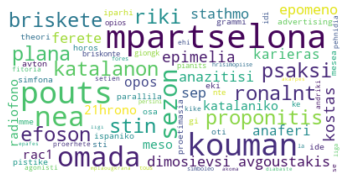

In [59]:
custom_mask = np.array(Image.open('stormtrooper_mask.png'))
wc = WordCloud(
                          background_color='white', # Define background color
                          stopwords=stopwords,      # Extract some words from word cloud
                          max_words=80,             # Number of the words appear in the word cloud
                          max_font_size=40,
                          mask=custom_mask)         #Error the png image does not appear.
wc.generate(str(text))
                          
#Create the plot.
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [62]:
image = Image.open('stormtrooper_mask.png')
print(image.format)
print(image.size)
print(image.mode)


PNG
(5400, 3600)
RGBA
